In [8]:
# 중국인 관광객 변화 추이
import pandas as pd 

df = pd.read_excel("Data/한국관광데이터/kto_201001.xlsx", header = 1,       # 두번째줄부터 열이름으로 사용하겠다
                   usecols = "A:G").iloc[:-4]            # usecol - A부터 G칼럼까지만 쓰겠다  /  iloc - 뒤쪽 4줄은 빼고 가져오겠다 
                   
df

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131.0,18238.0,421.0,4339.0,80916.0,433045.0
1,일본,202825.0,1750.0,89.0,549.0,3971.0,209184.0
2,대만,35788.0,41.0,17.0,37.0,516.0,36399.0
3,홍콩,13874.0,55.0,0.0,21.0,595.0,14545.0
4,마카오,554.0,0.0,0.0,0.0,0.0,554.0
...,...,...,...,...,...,...,...
62,아프리카 기타,349.0,594.0,25.0,86.0,296.0,1350.0
63,기타대륙,10.0,3.0,0.0,0.0,0.0,13.0
64,국적미상,10.0,3.0,0.0,0.0,0.0,13.0
65,교포소계,0.0,0.0,0.0,0.0,22537.0,22537.0


In [25]:
from tqdm import tqdm       # tqdm: for문의 진행상황을 알려주는 도구

total = []
for y in tqdm(range(2010, 2021)):      # 2010~2020년
    for m in range(1, 13):             # 1~12월 
        year = y
        month = str(m).zfill(2)      # 2자리가 안되면 0채워줌 
        print(year, month)
        if year == 2020 and m == 6:         # 2020년 6월 되면 for문 빠져나옴
            break
        df = pd.read_excel(f"Data/한국관광데이터/kto_{year}{month}.xlsx", 
                           header = 1, usecols = "A:G", skipfooter = 4)
        df['YEAR'] = y
        df['MONTH'] = m
        df['DATE'] = f"{y}-{m}"           # 두개의 파생변수 date에 넣는 것  => 총 열 세개추가됨 
        total.append(df)

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

2010 01
2010 02
2010 03
2010 04
2010 05
2010 06
2010 07
2010 08
2010 09


  9%|███████▌                                                                           | 1/11 [00:00<00:05,  1.70it/s]

2010 10
2010 11
2010 12
2011 01
2011 02
2011 03
2011 04
2011 05
2011 06
2011 07
2011 08
2011 09
2011 10
2011 11
2011 12


 18%|███████████████                                                                    | 2/11 [00:01<00:05,  1.64it/s]

2012 01
2012 02
2012 03
2012 04
2012 05
2012 06
2012 07
2012 08
2012 09


 27%|██████████████████████▋                                                            | 3/11 [00:01<00:04,  1.70it/s]

2012 10
2012 11
2012 12
2013 01
2013 02
2013 03
2013 04
2013 05
2013 06
2013 07
2013 08
2013 09
2013 10
2013 11
2013 12


 36%|██████████████████████████████▏                                                    | 4/11 [00:02<00:04,  1.73it/s]

2014 01
2014 02
2014 03
2014 04
2014 05
2014 06
2014 07
2014 08
2014 09
2014 10
2014 11
2014 12


 45%|█████████████████████████████████████▋                                             | 5/11 [00:02<00:03,  1.86it/s]

2015 01
2015 02
2015 03
2015 04
2015 05
2015 06
2015 07
2015 08
2015 09
2015 10


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:03<00:02,  1.75it/s]

2015 11
2015 12
2016 01
2016 02
2016 03
2016 04
2016 05
2016 06
2016 07
2016 08
2016 09
2016 10


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:04<00:02,  1.73it/s]

2016 11
2016 12
2017 01
2017 02
2017 03
2017 04
2017 05
2017 06
2017 07
2017 08
2017 09
2017 10
2017 11
2017 12


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:04<00:01,  1.75it/s]

2018 01
2018 02
2018 03
2018 04
2018 05
2018 06
2018 07
2018 08
2018 09


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:05<00:01,  1.71it/s]

2018 10
2018 11
2018 12
2019 01
2019 02
2019 03
2019 04
2019 05
2019 06
2019 07
2019 08
2019 09
2019 10
2019 11
2019 12


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:05<00:00,  1.68it/s]

2020 01
2020 02
2020 03
2020 04
2020 05


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:06<00:00,  1.81it/s]

2020 06


In [12]:
len(total)

125

In [28]:
import koreanize_matplotlib

df = pd.concat(total, ignore_index = True)       # 125개의 데이터 다 가져와서 하나의 데이터프레임으로 만듦 
df['DATE'] = pd.to_datetime(df["DATE"])              # DATE를 datetime형태로 인식하도록 변환
df = df.set_index("DATE")                   # 인덱스를 DATE열로 설정   DATE열을 기준으로 함 

china = df[df["국적"] == "중국"]          # 데이터프레임에서 국적이 중국인것만 데이터프레임형태로 가져와서 china로 저장 
china

,국적,관광,상용,공용,유학/연수,기타,계,YEAR,MONTH
DATE,,,,,,,,,
2010-01-01,중국,40425,11930,55,2751,36091,91252,2010,1
2010-02-01,중국,60590,7907,68,29546,42460,140571,2010,2
2010-03-01,중국,50330,13549,174,14924,62480,141457,2010,3
2010-04-01,중국,84252,13306,212,2199,47711,147680,2010,4
2010-05-01,중국,89056,12325,360,2931,49394,154066,2010,5
...,...,...,...,...,...,...,...,...,...
2020-01-01,중국,393336,2813,99,10433,75000,481681,2020,1
2020-02-01,중국,49520,715,11,20753,33087,104086,2020,2
2020-03-01,중국,5040,115,2,7388,4050,16595,2020,3


<Axes: xlabel='DATE'>

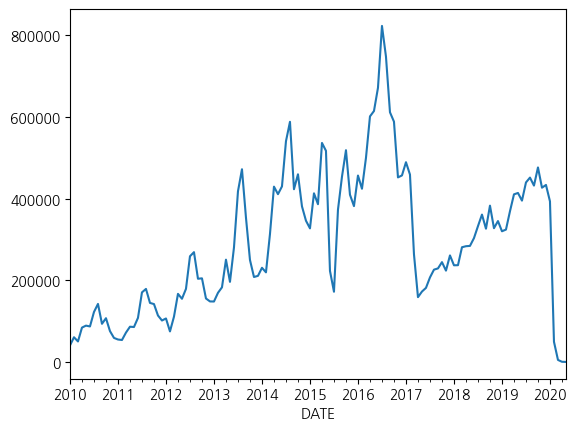

In [29]:
china["관광"].plot()       # 중국인관광객 변화추이 플롯형태로 확인 

<Axes: xlabel='MONTH', ylabel='YEAR'>

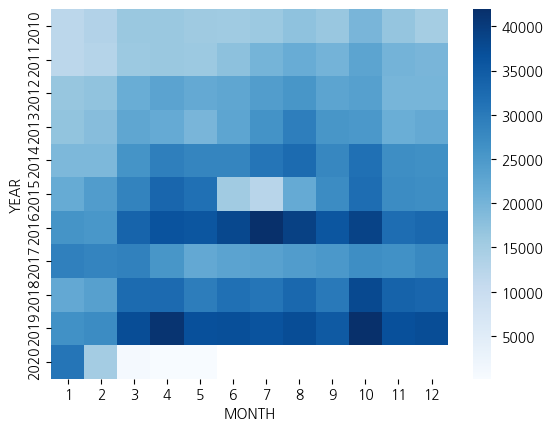

In [34]:
table = df.pivot_table(index = "YEAR", columns = "MONTH",
                       values = "관광")

sns.heatmap(table, cmap = "Blues")

In [ ]:
# 2015년 6~8월에 양상이 다름 => 메르스
# 2017년 => 사드보복 

In [54]:
import pickle

#### 전화번호 관리 프로그램
# 퀴즈: 전화번호를 입력하면 삭제해주는 기능 만들기.

f = open("phone.dat", 'rb')
phone_box = pickle.load(f)
f.close()

def del_numbers():
    numbers = input("입력: ")
    for idx, i in enumerate(phone_box):
        if numbers == i[1]:
            del phone_box[idx]
            print("전화번호 삭제 완료!")
            f = open("phone.dat", "wb")
            pickle.dump(phone_box, f)           # 삭제 반영
            f.close()

def show_info():
    for name, phone in phone_box:
        print(f"{phone} {name}")       # 종료후 다시 실행했을때도 전화번호 남아있음

def add_numbers():
    name = input("이름: ")
    number = input("번호: ")
    A = [name, number]
    if A not in phone_box:
        phone_box.append(A)
        print("전화번호 저장 완료!")
        f = open("phone.dat", "wb")      # phone_box에 새로운게 들어갈때마다 저장
        pickle.dump(phone_box, f)
        f.close()


while True:
    print("""
    전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료
    """)

    n = int(input("입력: "))
    if n == 1:
        add_numbers()
    elif n == 2:
        show_info()
    elif n == 3:
        del_numbers()
    elif n == 4:
        break

    print()


    전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료
    


입력:  1
이름:  이이이
번호:  01022222222


전화번호 저장 완료!


    전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료
    


입력:  2


01023456789 장원영
01098765432 홍길동
01011111111 김김김
01022222222 이이이


    전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료
    


입력:  3
입력:  01022222222


전화번호 삭제 완료!


    전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료
    


입력:  2


01023456789 장원영
01098765432 홍길동
01011111111 김김김


    전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료
    


입력:  4
